# Zack Lee: Final Project CS456

In [144]:
# Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [145]:
games_df = pd.read_csv('vgsales.csv')

Print the head of the data frame to see the datas attributes

In [146]:
games_df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# list the different object types
games_df.dtypes

Unnamed: 0        int64
Rank              int64
Name             object
Platform         object
Year            float64
Publisher        object
Developer        object
Critic_Score    float64
User_Score      float64
NA_Sales        float64
PAL_Sales       float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Section 1: Which regions sales correlate most strongly with each other, and which ones correlate to global sales the most?

I will show which regions sales are most correlated to each other and which regional sales contribute/correlate the most towards the global sales using a correlation matrix

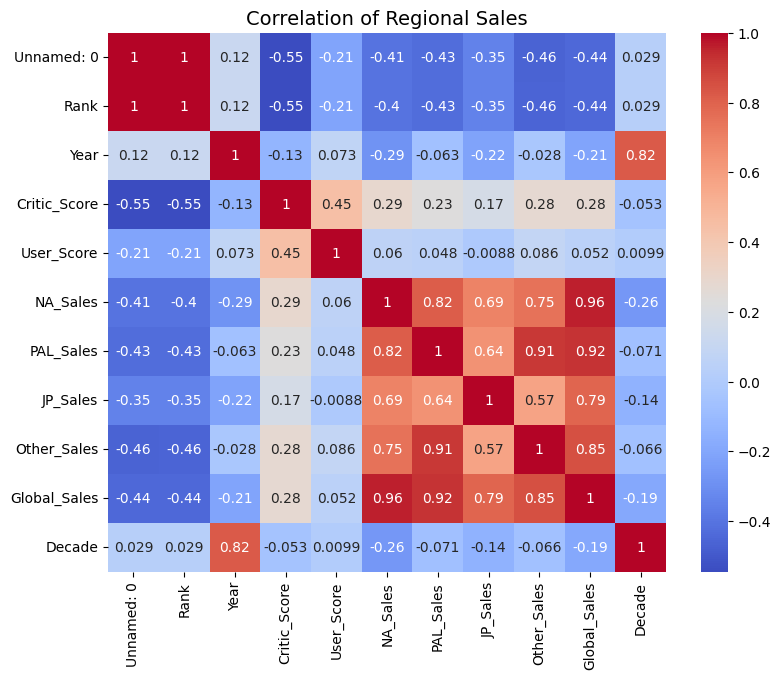

<Figure size 640x480 with 0 Axes>

In [177]:
reg_sales = games_df.iloc[:, :].corr(numeric_only = True)
plt.figure(figsize=(9,7))
sns.heatmap(reg_sales, annot=True, cmap='coolwarm')
plt.title("Correlation of Regional Sales", fontsize=14)
plt.show()
plt.savefig("Correlation_Matrix_Zack.png")

In the above correlation matrix, looking just as the sales portion of the matrix in the bottom right. Starting with the NA region, we can see that PAL sales correlate mostly with the NA region. As for the rest of the regions which inlcude PAL, JP, and other regions. That NA sales correlated the most towards all other regional sales. Or did it? 

Lets check this by sorting the values and based on which attribute we are looking at and printing the top 3 values of each correlation.

Starting with the NA region sales

In [149]:
NA = reg_sales['NA_Sales'].drop(["NA_Sales", "Global_Sales"])
print(NA.sort_values(ascending = False).head())

PAL_Sales       0.752031
Other_Sales     0.648550
JP_Sales        0.504691
Critic_Score    0.263950
User_Score      0.130975
Name: NA_Sales, dtype: float64


As we can see in the above code, by sorting the values and dropping the NA_Sales and Global_Sales, we can see that in terms of correlation it goes PAL sales, Other Sales, and then Japan sales. 

Next we will look at the PAL sales

In [150]:
PAL = reg_sales['PAL_Sales'].drop(["PAL_Sales", "Global_Sales"])
print(PAL.sort_values(ascending = False).head())

NA_Sales        0.752031
Other_Sales     0.742473
JP_Sales        0.462581
Critic_Score    0.227500
User_Score      0.114720
Name: PAL_Sales, dtype: float64


Just like we previously saw, NA sales is the most correlated to the PAL sales followed by other sales and then Japan sales

Laslty, lets look at Japan and Other sales in terms of correlation to other regions

In [151]:
JP = reg_sales['JP_Sales'].drop(["JP_Sales", "Global_Sales"])
Other = reg_sales['Other_Sales'].drop(["Other_Sales", "Global_Sales"])

In [152]:
print(JP.sort_values(ascending = False).head())

NA_Sales        0.504691
PAL_Sales       0.462581
Other_Sales     0.271071
Critic_Score    0.209008
User_Score      0.034414
Name: JP_Sales, dtype: float64


In [153]:
print(Other.sort_values(ascending = False).head())

PAL_Sales       0.742473
NA_Sales        0.648550
JP_Sales        0.271071
Critic_Score    0.202575
User_Score      0.175456
Name: Other_Sales, dtype: float64


Unlike my previous statement, we can see that in terms of Japan Sales, NA still has the biggest correlation followed by PAL sales, and then Other sales. But in terms of Other sales, the PAL regional sales actually correlates the most to the Other sales unlike the rest of the regions that are mostly dependent on the NA sales in terms of correlation on sales per region.

Finally, lets look at which regional sales correlate the most to the overall global sales

In [154]:
global_sales = reg_sales['Global_Sales'].drop("Global_Sales")
print(global_sales.sort_values(ascending = False).head())

NA_Sales        0.941104
PAL_Sales       0.903015
Other_Sales     0.765800
JP_Sales        0.625861
Critic_Score    0.252686
Name: Global_Sales, dtype: float64


As we couldve assumed based on the previous findings, the NA regional sales correlates the most with global sales meaning that when the global sales are rising, it is will mostly be because of the NA region selling a substantial amount of a video games to the consumer. Based on this data we can see what region companies should focus on for advertising and consumerism in order to sell the most amount of games possible to maximize profits.

# Section 1 Conclusion

By using a correlation matrix and filtering the data, we were able to extract valuable information on regional sales and see what regions sales correlated to each other the most and which regions sales correlated to the overal global sales the most

# Section 2: Can we classify video games into low, medium, and high selling games based on their regional sales using KNN?

In this section I will be attempting to use KNN to classify the video games into different categories or sections based on their regional sales

In [155]:
# First we will select our different categories/classes and unskew the dataset
games_df = games_df.dropna()
games_df['Sales_Class'] = pd.cut(games_df['Global_Sales'], bins = [0, 0.5, 2, 100], labels = ['Low Sales', 'Medium Sales', 'High Sales'])

In [156]:
# Select our X and y values
X = games_df[['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year']]
y = games_df['Sales_Class']

In [157]:
# normalize our data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [158]:
# Train our data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

In [159]:
# Make the KNN model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [160]:
# display a small confusion matrix to show the split between the different classes of sales
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  0,  2],
       [ 0,  5,  1],
       [ 1,  2, 21]])

By showing the confusion matrix, we can see that 24 games were classified correclty as low selling games, and one was incorreclt classified as high selling. In the medium sales, 3 were correctly calssified with 2 being incorreclty classified in the high selling games. Lastly with the high selling games, 16 games were correctly classified while 7 were not with that split being 4, 3 into low and medium games. This demonstrates that our classification can predict low-selling games very accurately with 24/25 being correct, but with the medium selling games, only 3/5 were correctly classified. This is not a very good result but very helpful non the less, the calssification was worse because of some overlap between the high and medium selling games. Laslty we can see high selling games was 16/23 correct which is 69% accurate.

In [161]:
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    cv_scores.append(scores.mean())


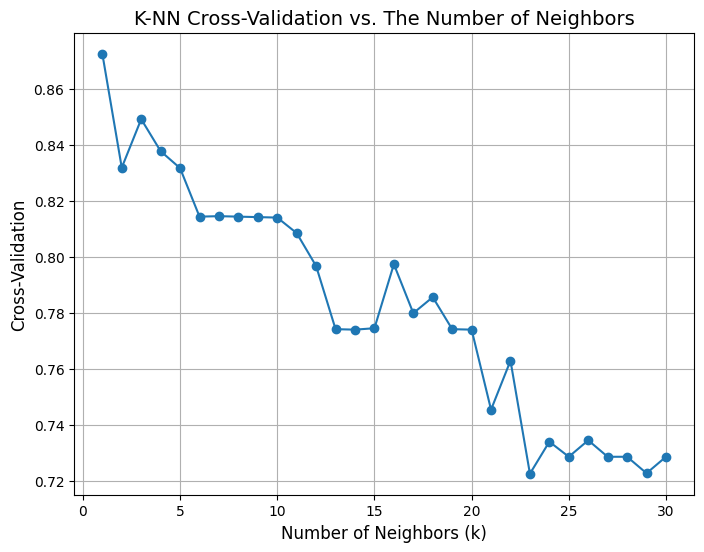

<Figure size 640x480 with 0 Axes>

In [178]:
# Plot the Figure
plt.figure(figsize=(8,6))
plt.plot(k_values, cv_scores, marker='o')
plt.title("K-NN Cross-Validation vs. The Number of Neighbors", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Cross-Validation", fontsize=12)
plt.grid(True)
plt.show()
plt.savefig("Cross_Validation_Zack.png")

In [163]:
# get the best k value
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

best_k, best_score

(1, np.float64(0.8724369747899159))

In the above plot we can see the KNN cross-validation versus the number of neighbors, or in simpler terms we can see how well our model can predict and classify the games regional sales or accuracy based on different values of k. We can see that the best k value is actually 1 with an accuracy of around 87% for the different classifiaction which is not perfect but still very good. 

# Section 2 Conclusion

In conclusion, we can use KNN to classifiy the the video games into different sales categories (Low, Medium, and High). Using the confusion matrix we weere able to check our classifications and see which one were successful and which ones were more inaccurate. After that we used cross-validation to check for different k values for which one was optimal in classifiying the different classes. We found that when k = 1 with a fold of 5, produced the best result with an accuracy of around 87.3% for calssifying the differenr regional sales classes.

# Section 3: How have the global sales changed over the decades?

In this section I will be breaking down the games into different years of release date in order to see the change in sales accross different decades. I will be using a line graph to show the yearly global sales, bar chart to compare the different global sales, outliers, and regional sale trends.

In [164]:
# group into different decades
games_df['Decade'] = (games_df['Year'] // 10) * 10
games_df

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Class,Decade
62,63,74,Super Mario Bros.,NES,1985.0,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24,High Sales,1980.0
69,70,81,Mario Kart Wii,Wii,2008.0,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98,High Sales,2000.0
81,82,93,Wii Sports Resort,Wii,2009.0,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90,High Sales,2000.0
91,92,103,New Super Mario Bros.,DS,2006.0,Nintendo,Nintendo EAD,9.1,8.1,11.28,9.19,6.50,2.89,29.85,High Sales,2000.0
92,93,104,New Super Mario Bros. Wii,Wii,2009.0,Nintendo,Nintendo EAD,8.6,9.2,14.53,7.01,4.70,2.27,28.51,High Sales,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13045,13500,13641,BlazBlue: Calamity Trigger Portable,PSP,2010.0,Aksys Games,Arc System Works,7.9,8.4,0.07,0.01,0.03,0.01,0.11,Low Sales,2010.0
13160,13617,13758,Ys VIII: Lacrimosa of Dana,NS,2018.0,NIS America,Nihon Falcom Corporation,8.5,6.7,0.03,0.03,0.03,0.01,0.11,Low Sales,2010.0
14212,14680,14831,Battle Fantasia,X360,2008.0,Aksys Games,Arc System Works,7.0,8.0,0.07,0.00,0.01,0.01,0.09,Low Sales,2000.0
16591,17072,17253,Muramasa: The Demon Blade,Wii,2009.0,Ignition Entertainment,Vanillaware,8.0,9.3,0.32,0.13,0.11,0.04,0.60,Medium Sales,2000.0


In [165]:
# get the total global sales per decade (In millions)
games_df.groupby('Decade')['Global_Sales'].sum()

Decade
1980.0     40.24
1990.0     35.28
2000.0    506.51
2010.0    158.15
Name: Global_Sales, dtype: float64

In [166]:
# get the average amount of games sold per decade
games_df.groupby('Decade')['Global_Sales'].mean()

Decade
1980.0    40.240000
1990.0     5.040000
2000.0     4.220917
2010.0     3.438043
Name: Global_Sales, dtype: float64

In [167]:
# Show the one outlier
games_df[games_df['Decade'] == 1980]

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Class,Decade
62,63,74,Super Mario Bros.,NES,1985.0,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24,High Sales,1980.0


In [168]:
# get the number of games released per decade
games_df.groupby('Decade').size()

Decade
1980.0      1
1990.0      7
2000.0    120
2010.0     46
dtype: int64

In the above sections of code we can see the total number of global sales by decade, the average amount of games sold per decade, and laslty the total number of different games released per decade.

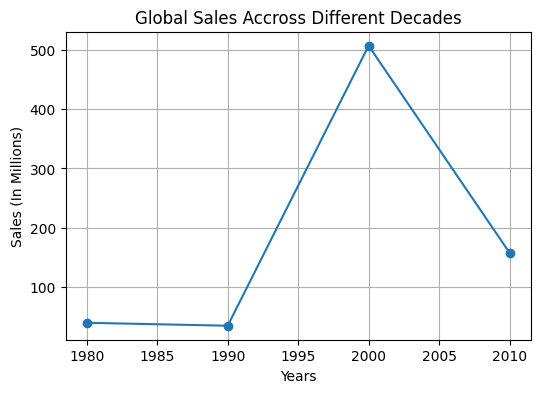

<Figure size 640x480 with 0 Axes>

In [179]:
# plot the sales (in millions) accross the decades
d_sales = games_df.groupby('Decade')['Global_Sales'].sum()
plt.figure(figsize=(6,4))
plt.plot(d_sales.index, d_sales.values, marker='o')
plt.title("Global Sales Accross Different Decades")
plt.xlabel("Years")
plt.ylabel("Sales (In Millions)")
plt.grid(True)
plt.show()
plt.savefig("Sales_Line_Zack.png")

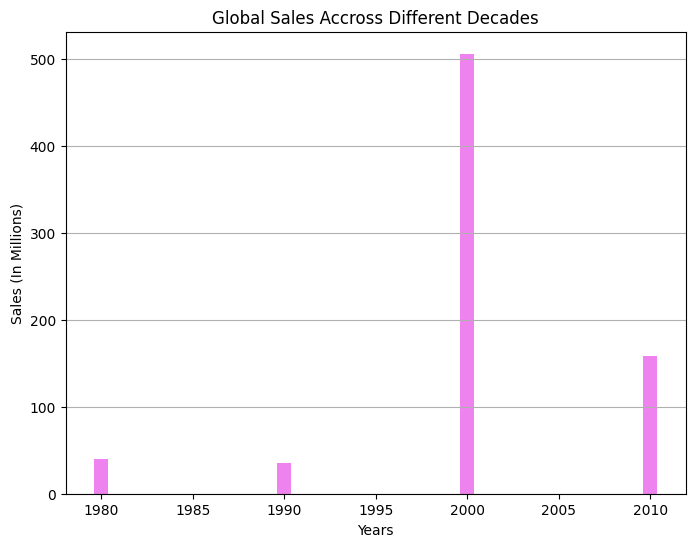

<Figure size 640x480 with 0 Axes>

In [180]:
# do the same using a bar plot 
plt.figure(figsize=(8,6))
plt.bar(d_sales.index, d_sales.values, color = 'violet')
plt.title("Global Sales Accross Different Decades")
plt.xlabel("Years")
plt.ylabel("Sales (In Millions)")
plt.grid(axis = 'y')
plt.show()
plt.savefig("Sales_Bar_Zack.png")

Looking at the above line and bar plots, we can see the temporal trends or differences in global sales based on the different decades. In the 1980s we can see that global sales were only 40.24 million, the 1990's sold even less than the 80's with only 35.28 million but in the 2000's the global sales reach an all time high of 506.51 million. Following this massive boom we could expect another on or one of similar size but in the 2010s there was a significant decrease in global sales where it only reached 158.15 million in sales. Lets take a deeper look into the data and find the biggest contributors and publishers during this time.

In [171]:
# Grab the different publishers in the dataset
publishers = games_df['Publisher'].unique()
publishers

array(['Nintendo  ', 'Sony Interactive Entertainment  ',
       'Microsoft Game Studios  ', 'Activision  ', 'Rockstar Games  ',
       'Sony Computer Entertainment  ', 'Square  ', 'Konami  ',
       'Square Enix  ', 'Ubisoft  ', 'Capcom  ', 'Bethesda Softworks  ',
       'Enix  ', 'Electronic Arts  ', 'Valve Corporation  ', '2K Games  ',
       'RedOctane  ', 'LucasArts  ', 'Square EA  ', 'Sega  ',
       'EA Sports  ', 'Atari  ', 'Atlus  ', 'Namco Bandai  ', 'THQ  ',
       'Working Designs  ', 'Namco  ', 'Bandai Namco Entertainment  ',
       'Ignition Entertainment  ', 'Natsume  ', 'Xseed Games  ',
       'Aksys Games  ', 'NIS America  '], dtype=object)

In [172]:
# get the number of games each publisher has released
publisher_counts = games_df['Publisher'].value_counts()
publisher_counts

Publisher
Nintendo                            36
Sony Computer Entertainment         24
Capcom                              16
Sega                                11
Square Enix                         10
Microsoft Game Studios              10
Ubisoft                              9
Konami                               7
Activision                           6
Electronic Arts                      6
Rockstar Games                       5
2K Games                             3
Bethesda Softworks                   3
Namco Bandai                         3
Atlus                                2
THQ                                  2
Sony Interactive Entertainment       2
Xseed Games                          2
Aksys Games                          2
Ignition Entertainment               2
Square                               1
RedOctane                            1
Valve Corporation                    1
Enix                                 1
EA Sports                            1
Atari          

In [173]:
# Get the number of sales per publisher
publisher_sales = games_df.groupby('Publisher')['Global_Sales'].sum()
publisher_sales.sort_values(ascending = False)

Publisher
Nintendo                            371.99
Sony Computer Entertainment          79.25
Microsoft Game Studios               43.75
Capcom                               41.06
Activision                           37.88
Rockstar Games                       28.21
Square Enix                          26.83
Ubisoft                              15.65
Konami                               14.92
Electronic Arts                      12.96
Sega                                 12.33
Sony Interactive Entertainment       11.97
Square                                8.05
Bethesda Softworks                    6.54
2K Games                              4.72
Enix                                  4.47
Valve Corporation                     3.52
RedOctane                             2.25
Atlus                                 2.09
Square EA                             1.86
LucasArts                             1.86
Namco Bandai                          1.46
THQ                                   1.24
E

In [174]:
# Get each publishers global sales for each decade
pub_dec_sales = games_df.groupby(['Publisher', 'Decade'])['Global_Sales'].sum()
pub_dec_sales

Publisher                         Decade
2K Games                          2000.0      4.72
Activision                        2000.0     37.88
Aksys Games                       2000.0      0.09
                                  2010.0      0.11
Atari                             2000.0      1.03
Atlus                             2000.0      1.83
                                  2010.0      0.26
Bandai Namco Entertainment        2010.0      0.33
Bethesda Softworks                2000.0      4.96
                                  2010.0      1.58
Capcom                            2000.0     34.16
                                  2010.0      6.90
EA Sports                         2010.0      1.10
Electronic Arts                   2000.0      2.34
                                  2010.0     10.62
Enix                              2000.0      4.47
Ignition Entertainment            2000.0      0.60
                                  2010.0      0.26
Konami                            1990.0 

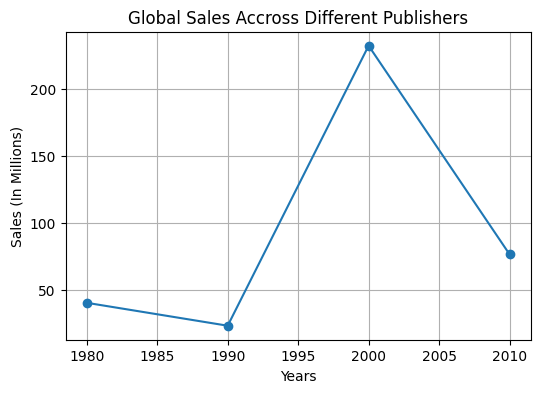

<Figure size 640x480 with 0 Axes>

In [181]:
# plot the results for nintendo
publisher_name = "Nintendo  "
nintendo_sales = pub_dec_sales.loc[publisher_name]
plt.figure(figsize=(6,4))
plt.plot(nintendo_sales.index, nintendo_sales.values, marker='o')
plt.title("Global Sales Accross Different Publishers")
plt.xlabel("Years")
plt.ylabel("Sales (In Millions)")
plt.grid(True)
plt.show()
plt.savefig("Nintendo_Line_Zack.png")

Comparing the ealrier line plot to the nintendo line plot, we can accuratly see/assume that nintendo is the leading driver in global sales accross the different decades amongst all the publishers. Lets also look at what games came out in the 2000's.

In [176]:
# display all the games in the 2000s and their global sales
games_df[games_df['Decade'] == 2000.0][['Name','Global_Sales']]

,Name,Global_Sales
69,Mario Kart Wii,35.98
81,Wii Sports Resort,32.90
91,New Super Mario Bros.,29.85
92,New Super Mario Bros. Wii,28.51
107,Wii Play,28.92
...,...,...
10916,Castlevania Judgment,0.16
12139,Little King's Story,0.29
14212,Battle Fantasia,0.09
16591,Muramasa: The Demon Blade,0.60


# Section 3 Conclusion

In conclusion, there were only 4 decades in the dataset (1980, 1990, 2000, 2010), and after separating the values into different decades and getting the total global sales per decade, we can see the trends across the decades with lower sales in the 1980'ss and 1990s than a massive increase in the 2000's with a sharp decline into the 2010's. We can also see the games that came out in the 2000's that contributed to the massive increase with those games being "Mario Kart Wii", "Wii Sports Resort" (My favorite), "Super Mario Bros" which had massivle global sales and easily contributed the most towards the 2000's having the most global sales across the decades.